# Gradient_calculation_with_Autograd

Gradients are essential for model optimisation...

PyTorch provides the Autograd package which will help calculate gradients...

https://www.youtube.com/watch?v=M0fX15_-xrY   -- The Fundamentals of Autograd

In [1]:
import torch

In [2]:
x = torch.randn(3)
print(x)

tensor([-0.6890, -0.9096, -0.1978])


Lets say we want to calculate the gradient of some function with respect to x...then we have to specify 
the argument ...

(requires_grad = True)

In [3]:
x = torch.randn(3, requires_grad = True) # x wants gradients computed on any calculation its involved in...
print(x)

tensor([-0.0834, -0.6634,  0.4836], requires_grad=True)


Now whenever we make computations with the tensor, python will make a so called "Computational Graph"...

In [4]:
y = x + 2
print(y)

tensor([1.9166, 1.3366, 2.4836], grad_fn=<AddBackward0>)


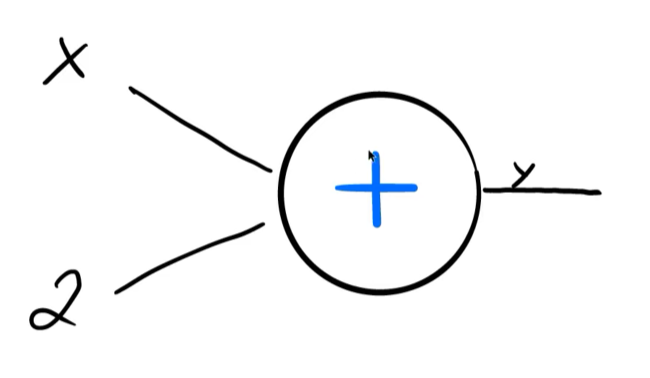

Backpropagation...

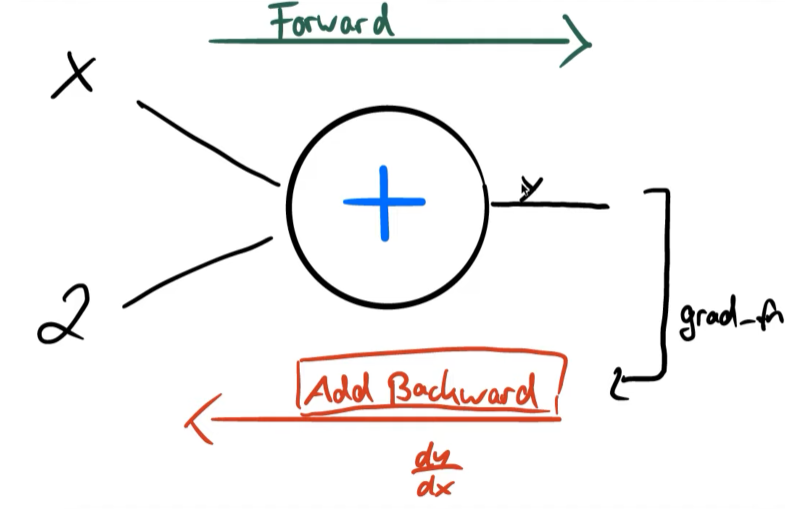

In the forward pass we calculate the output y, and since we specified that it requires calculation of the gradient,
Python will automatically create and store a function which will be used in backpropagation. So it will calculate the gradient of y with respect to x in this case.

In [5]:
# Some more operations...
z = y * y * 2
print(z)

tensor([ 7.3471,  3.5728, 12.3365], grad_fn=<MulBackward0>)


In [6]:
z = z.mean()
print(z)

tensor(7.7521, grad_fn=<MeanBackward0>)


#### To calculate the gradients...

In [7]:
z.backward() # This will calculate the gradient of z with respect to x...

#### x will then have a .grad attribute where the gradients are stored...

In [8]:
x.grad

tensor([2.5555, 1.7821, 3.3115])

------

#### In the background its creating a vector jacobian product to get the gradients...
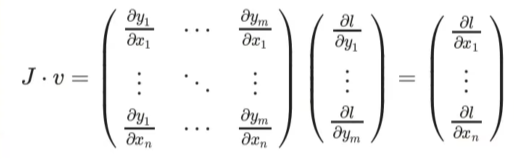

#### The first block is the jacobian matrix with the partial derivatives.....and its multiplied with a gradient vector to get the final gradient...

In the example above, instead of multiplying with a vector, we have multiplpied with a scalar value, which is why we did'nt have to use an argument for the backward function (inside the z.backward() code).

SIDENOTE - By default.... Autograd expects the final function in a gradient computation to be a single value.

---

### Case where we are not working with scalar value, or we dont use the .mean() value...

In [9]:
x = torch.randn(3, requires_grad = True)
print(x)

tensor([-1.3798,  1.3069, -1.9581], requires_grad=True)


In [10]:
y = x + 2
print(y)

tensor([0.6202, 3.3069, 0.0419], grad_fn=<AddBackward0>)


In [11]:
z = y * y * 2
print(z)

tensor([7.6919e-01, 2.1872e+01, 3.5109e-03], grad_fn=<MulBackward0>)


In [12]:
try:
    z.backward()
except Exception as e:
    print(e)
    
    
# Notice the Runtime error...

grad can be implicitly created only for scalar outputs


#### So what we do is we provide the gradient argument with the same size...

In [13]:
v = torch.tensor([0.1, 1.0, 0.001], dtype = torch.float32) # The vector to be passed to the backward function...

In [14]:
try:
    z.backward(v)
    print(z)
    print('\n\n')
    print('Gradients :-')
    print(x.grad)
except Exception as e:
    print(e)

tensor([7.6919e-01, 2.1872e+01, 3.5109e-03], grad_fn=<MulBackward0>)



Gradients :-
tensor([2.4806e-01, 1.3228e+01, 1.6759e-04])


----

#### You may need a copy of tensor without the tracking history...        The detach method...creates a copy of the tensor without the computation history...

### In order to enable automatic differentiation, PyTorch keeps track of all operations involving tensors for which the gradient may need to be computed (i.e., require_grad is True). The operations are recorded as a directed graph. The detach() method constructs a new view on a tensor which is declared not to need gradients, i.e., it is to be excluded from further tracking of operations, and therefore the subgraph involving this view is not recorded.

---

### 3 methods to prevent tracking history...
---  1) x.requires_grad_(False)

---  2) x.detach()

---  3) with torch.no_grad():

In [21]:
# 1) x.requires_grad(False)
x = torch.randn(3, requires_grad = True)
print(x)

x.requires_grad_(False)
print(x)

tensor([-0.1754,  0.0268, -0.8678], requires_grad=True)
tensor([-0.1754,  0.0268, -0.8678])


In [22]:
# 2) x.detach()
x = torch.randn(3, requires_grad = True)
print(x)

y = x.detach()
print(y)

tensor([2.1686, 0.7515, 1.7464], requires_grad=True)
tensor([2.1686, 0.7515, 1.7464])


In [23]:
# 3) with torch.no_grad():
x = torch.randn(3, requires_grad = True)
print(x)

with torch.no_grad():
    y = x + 2
    print(y)

tensor([-0.6027,  1.7336, -0.5241], requires_grad=True)
tensor([1.3973, 3.7336, 1.4759])


----

# Whenever we call the .backward function, the gradients keep getting accumulated

In [ ]:
# pop = torch.ones(4, requires_grad = True)
# print((pop*3).sum())

In [27]:
weights = torch.ones(4, requires_grad = True) #  <--------  

for epoch in range(1): 
    model_output = (weights*3).sum()
    
    model_output.backward()
    
    print(weights.grad)  # Gradient values

tensor([3., 3., 3., 3.])


In [28]:
weights = torch.ones(4, requires_grad = True) #  <--------  

for epoch in range(2): # Changing number of iterations to 2...
    model_output = (weights*3).sum()
    
    model_output.backward()
    
    print(weights.grad)  # Gradient values

tensor([3., 3., 3., 3.])
tensor([6., 6., 6., 6.])


In [29]:
weights = torch.ones(4, requires_grad = True) #  <--------  

for epoch in range(3): # Changing number of iterations to 3...
    model_output = (weights*3).sum()
    
    model_output.backward()
    
    print(weights.grad)  # Gradient values

tensor([3., 3., 3., 3.])
tensor([6., 6., 6., 6.])
tensor([9., 9., 9., 9.])


### All the gradients are summed so the gradients are incorrect...

## So before we move onto the next iteration step, we must empty the gradients

In [30]:
weights = torch.ones(4, requires_grad = True) #  <--------  

for epoch in range(3): 
    model_output = (weights*3).sum()
    
    model_output.backward()
    
    print(weights.grad)  # Gradient values
    
    weights.grad.zero_()

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


---